# MOVER Exploratory Statistics

## Importing Libraries

In [1]:
from pathlib import Path
import unittest
import pandas as pd
import numpy as np
import os
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## File Paths

In [2]:
mover_path = Path("/home/server/Projects/data/MOVER")
info_path = mover_path / "EPIC_EMR/EMR/patient_information.csv"
history_path = mover_path / "EPIC_EMR/EMR/patient_history.csv"
visit_path = mover_path / "EPIC_EMR/EMR/patient_visit.csv"
events_path = mover_path / "EPIC_EMR/EMR/patient_procedure_events.csv"
meds_path = mover_path / "EPIC_EMR/EMR/patient_medications.csv"
labs_path = mover_path / "EPIC_EMR/EMR/patient_labs.csv"
lda_path = mover_path / "EPIC_EMR/EMR/patient_lda.csv"
postop_path = mover_path / "EPIC_EMR/EMR/patient_post_op_complications.csv"
coding_path = mover_path / "EPIC_EMR/EMR/patient_coding.csv"

Top 10 Most Common Procedures:
   rank                                     procedure_name  frequency
0     1  CATHETERIZATION, HEART, LEFT, WITH INTERVENTIO...       1560
1     2                      CHOLECYSTECTOMY, LAPAROSCOPIC       1222
2     3                            LAPAROSCOPY, DIAGNOSTIC       1063
3     4                            LAPAROTOMY, EXPLORATORY       1011
4     5                    DILATION AND EVACUATION, UTERUS        903
5     6  DEBRIDEMENT, WITH SPLIT-THICKNESS SKIN GRAFT A...        758
6     7                                 ARTHROPLASTY, KNEE        693
7     8        IRRIGATION AND DEBRIDEMENT, LOWER EXTREMITY        636
8     9                              ORIF, FRACTURE, FEMUR        617
9    10      AV FISTULOGRAM, WITH ANGIOPLASTY IF INDICATED        595

Summary Statistics of Procedure Frequencies:
count    1768.000000
mean       37.173077
std        95.737518
min         1.000000
25%         3.000000
50%         8.000000
75%        32.000000
max   

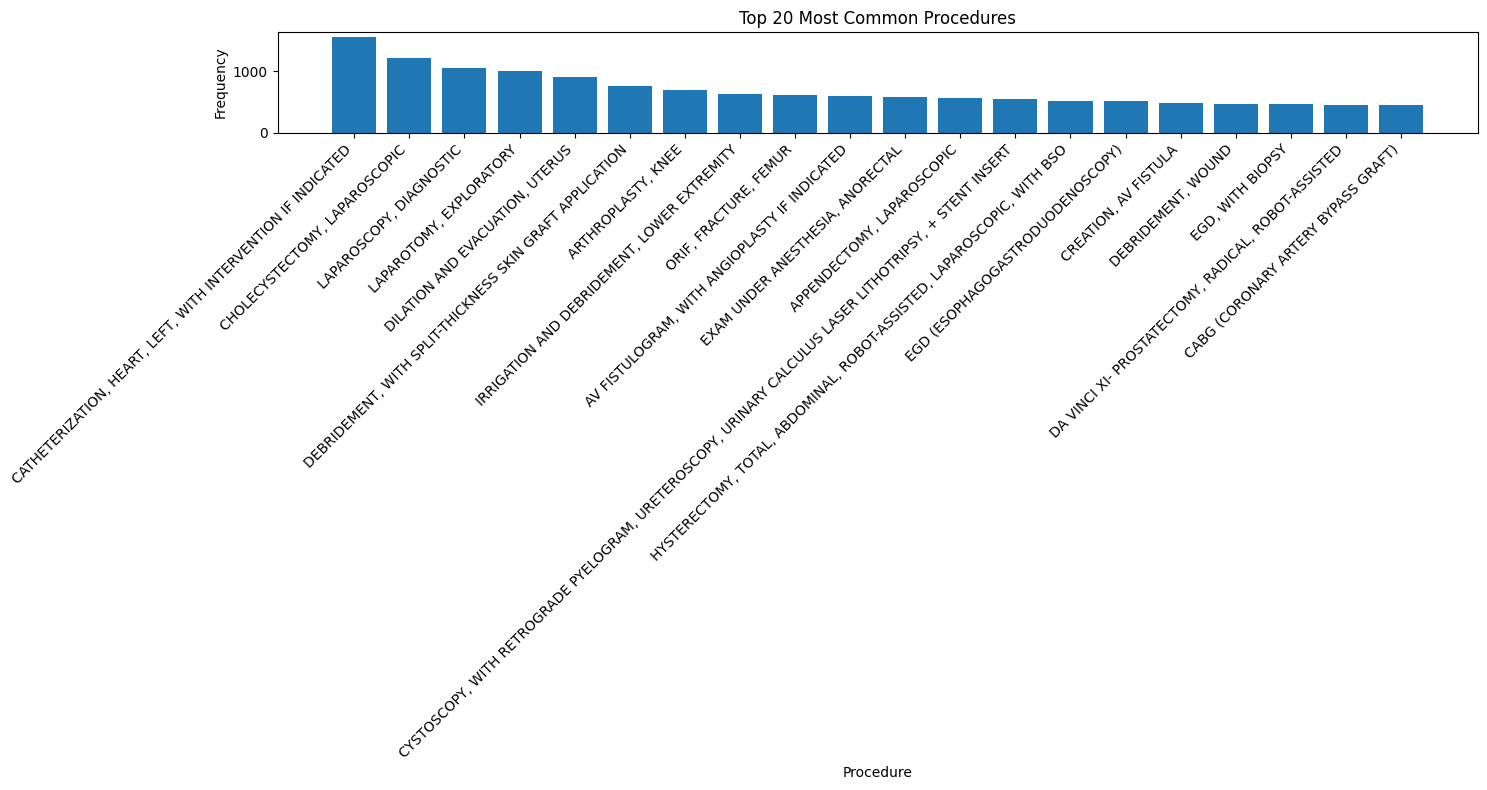

In [3]:
# Load patient information data
df_info = pd.read_csv(info_path.as_posix())

# Create frequency table of procedures
procedure_freq = df_info['PRIMARY_PROCEDURE_NM'].value_counts().reset_index()
procedure_freq.columns = ['procedure_name', 'frequency']

# Add rank column
procedure_freq['rank'] = range(1, len(procedure_freq) + 1)

# Reorder columns
procedure_freq = procedure_freq[['rank', 'procedure_name', 'frequency']]

# Display results
print("Top 10 Most Common Procedures:")
print(procedure_freq.head(10))

print("\nSummary Statistics of Procedure Frequencies:")
print(procedure_freq['frequency'].describe())

# Visualize top 20 procedures
plt.figure(figsize=(15,8))
plt.bar(procedure_freq['procedure_name'][:20], procedure_freq['frequency'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Procedures')
plt.xlabel('Procedure')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Check patient's previous diagnosis

In [4]:
# Create the dataframe
df_history = pd.read_csv(history_path.as_posix())

# Preview the first few rows
print("First 5 rows of patient_visit.csv:")
print(df_history.head())

# Get basic dataframe info
print("\nDataframe Info:")
print(df_history.info())

First 5 rows of patient_visit.csv:
                mrn diagnosis_code  \
0  b0064ab7d9de1fb0          054.0   
1  660dba43ab722490         054.42   
2  285bd3ff84a507f4         054.42   
3  713cff218865f4a3         054.79   
4  a75b440dac37861e          117.3   

                                             dx_name  
0                                  Eczema herpeticum  
1                                Dendritic keratitis  
2                                Dendritic keratitis  
3  Herpes simplex with other specified complicati...  
4                            Aspergillosis (CMS-HCC)  

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970741 entries, 0 to 970740
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   mrn             970741 non-null  object
 1   diagnosis_code  725297 non-null  object
 2   dx_name         970741 non-null  object
dtypes: object(3)
memory usage: 22.2+ MB
None


Top 10 Most Common Historical Diagnoses:
       rank diagnosis_code                                   dx_name  \
9988      1          401.9                    Essential hypertension   
9997      2          401.9                              Hypertension   
5351      3          285.9                                    Anemia   
4709      4          272.4                            Hyperlipidemia   
155       5          038.9                          Sepsis (CMS-HCC)   
15368     6          584.9       AKI (acute kidney injury) (CMS-HCC)   
15429     7          585.6  ESRD (end stage renal disease) (CMS-HCC)   
4588      8          268.9                      Vitamin D deficiency   
4689      9          272.2                      Mixed hyperlipidemia   
9990     10          401.9                        HTN (hypertension)   

       frequency  
9988        6612  
9997        5784  
5351        4253  
4709        4222  
155         3794  
15368       3606  
15429       3231  
4588        30

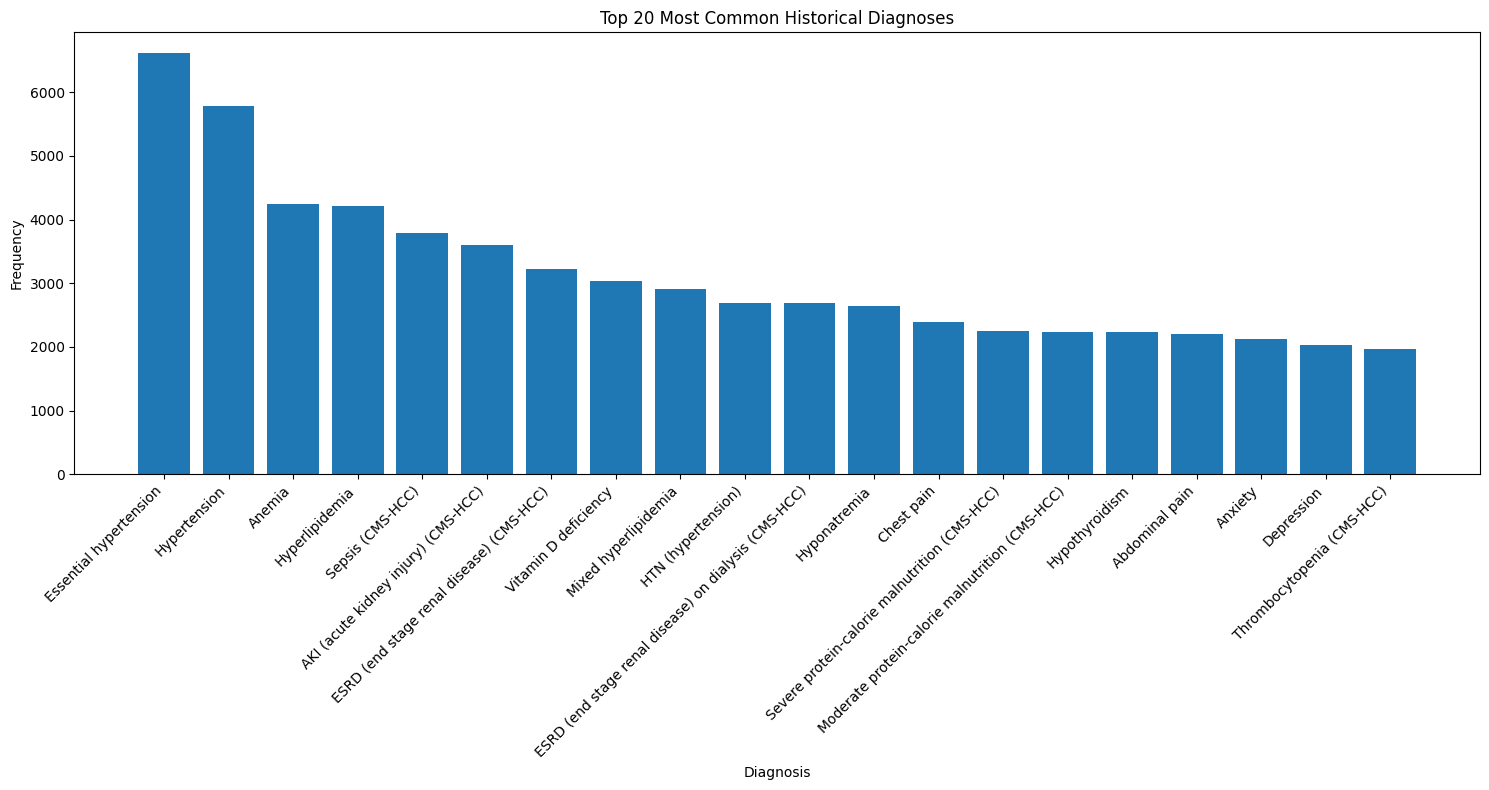

In [5]:
# Create frequency table of historical diagnoses
history_freq = df_history.groupby(['diagnosis_code', 'dx_name']).size().reset_index()
history_freq.columns = ['diagnosis_code', 'dx_name', 'frequency']

# Sort by frequency in descending order and add rank
history_freq = history_freq.sort_values('frequency', ascending=False)
history_freq['rank'] = range(1, len(history_freq) + 1)

# Reorder columns
history_freq = history_freq[['rank', 'diagnosis_code', 'dx_name', 'frequency']]

# Display results
print("Top 10 Most Common Historical Diagnoses:")
print(history_freq.head(10))

print("\nSummary Statistics of Diagnosis Frequencies:")
print(history_freq['frequency'].describe())

# Optional: Create bar plot of top 20 diagnoses
plt.figure(figsize=(15,8))
plt.bar(history_freq['dx_name'][:20], history_freq['frequency'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Historical Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()